# Центральная предельная теорема своими руками


In [1]:
import math
import scipy.stats as st
from scipy.stats import laplace
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## В качестве пример возьмем непрерывное распределение Лапласа

In [2]:
mu = laplace.mean()
mu

0.0

In [3]:
sigma = laplace.std()
sigma


1.4142135623730951

In [4]:
D = sigma ** 2
D

2.0000000000000004

Создадим функцию для генерацию выборки заданного размера

In [5]:
def generate(size):
    # используем функцию Лапласа
    return laplace.rvs(size=size)

Создадим функцию для вычисления выборочного среднего.

Входные параметры: выборка

Результат: выборочное среднее

Выборочное среднее считается как отношение суммы всех элементов выборки к общему количеству элементов выборки


In [6]:
def getAvg(ar):    
    totalElements = 0.0 + len(ar)
    return(sum(ar) / totalElements)

Размер исходной выборки

In [7]:
n=1000

Генерация выборки объема n

In [8]:
sample=generate(n)

## Гистограмма и теоретическая плотность распределения

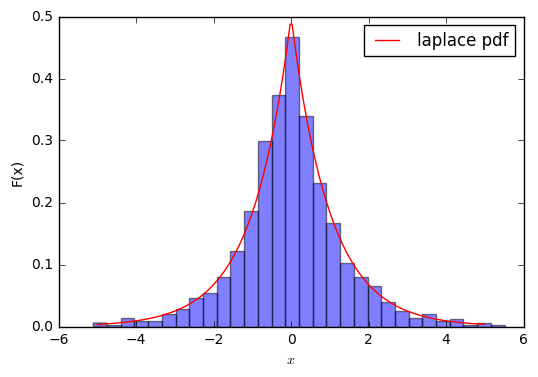

In [9]:
x = np.linspace(-5,5,200)
plt.hist(sample, normed=True, bins=30, alpha=0.5)
plt.ylabel('F(x)')
plt.xlabel('$x$')

# плотность распределения лапласа
pdf = laplace.pdf(x)
plt.plot(x, pdf, label='laplace pdf', color='red')

plt.legend()

## Оценка распределение выборочного среднего случайной величины (распределения Лапласа) при разных объёмах выборок

Количество выборок заданного размера

In [10]:
count = 1000

Проверка вычисления выборочного среднего

In [11]:
getAvg([1.5,2.5])

2.0

Функция, генерирующая заданное количество выборок определенного размера и подсчитывающая выборочные средние.
Входные параметры:
 - количество элеметов в выборке;
 - количество выборок.
 
Результат: массив выборочных средних, который можно использовать для построения гистограммы и т.д.

In [12]:
def experiment(size, count):
    return [getAvg(generate(size)) for x in xrange(0, count)]

## Выборки, содержащие 5 значений

In [134]:
n5 = 5
# получим массив выборочных средних
sample5 = experiment(n5, count)
# построим гистрогамму
plt.hist(sample5, normed=True, alpha=0.5,  bins=20, color = 'yellow')

# нормальное распределение для выборки объемом 5
# по ЦПТ дисперсия и отклонение
D5 = D/(n5 + 0.0)
print'дисперсия {}'.format(D5) 
sigma5 = math.sqrt(D5)
print'стандартное отклонение {}'.format(sigma5) 
norm_rv5 = st.norm(mu, sigma5)
pdf5 = norm_rv5.pdf(x)
plt.plot(x, pdf5, label='theoretical pdf', color='red')

plt.ylabel('F(x)')
plt.xlabel('$x$')

plt.legend()

дисперсия 0.4
стандартное отклонение 0.632455532034


## Выборки, содержащие 10 значений

дисперсия 0.2
стандартное отклонение 0.4472135955


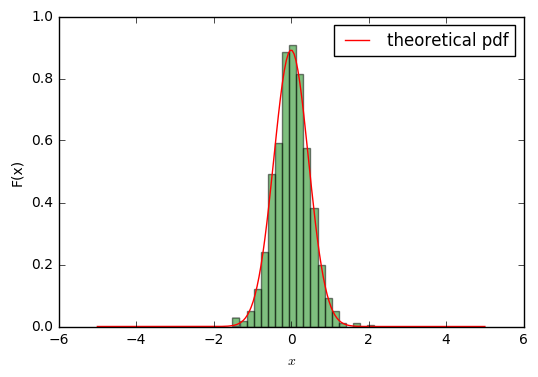

In [135]:
n10 = 10
# получим масси выборочных средних
sample10 = experiment(n10, count)
# построим гистрогамму
plt.hist(sample10, normed=True, alpha=0.5, bins=20, color = 'green')

# нормальное распределение для выборки объемом 10
# по ЦПТ дисперсия и отклонение
D10 = D/(n10 + 0.0)
print'дисперсия {}'.format(D10) 
sigma10 = math.sqrt(D10)
print'стандартное отклонение {}'.format(sigma10) 
norm_rv10 = st.norm(mu, sigma10)
pdf10 = norm_rv10.pdf(x)
plt.plot(x, pdf10, label='theoretical pdf', color='red')

plt.ylabel('F(x)')
plt.xlabel('$x$')

plt.legend()

## Выборки, содержащие 50 значений

In [136]:
n50 = 50
# получим масси выборочных средних
sample50 = experiment(n50, count)
# построим гистрогамму
plt.hist(sample50, normed=True, alpha=0.5, bins=10, color = 'green')

# нормальное распределение для выборки объемом 50
# по ЦПТ дисперсия и отклонение
D50 = D/(n50 + 0.0)
print'дисперсия {}'.format(D50) 
sigma50 = math.sqrt(D50)
print'стандартное отклонение {}'.format(sigma50) 
norm_rv50 = st.norm(mu, sigma50)
pdf50 = norm_rv50.pdf(x)
plt.plot(x, pdf50, label='theoretical pdf', color='red')

plt.ylabel('F(x)')
plt.xlabel('$x$')

plt.legend()

дисперсия 0.04
стандартное отклонение 0.2


Вывод: точность аппроксимации распределения выборочных средних нормальным распределением увеличивается с ростом количества элементов выборки.
Выводы, полученные на практике, подтверждают центральную предельную теорему.